In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import joblib

from model import lin_model_predict, lin_model_train, split_data, split_data_no_dummy, save_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Data Cleaning and EDA

The data has been scraped and cleaned through the py files which can be found in the src folder. 

In [2]:
df = pd.read_csv("zoopla_clean_df.csv", index_col=0)

In [3]:
df.head(5)

,price,number_bedrooms,"postcode_0Nb,",postcode_BR1,postcode_BR2,postcode_BR3,postcode_BR4,postcode_BR5,postcode_BR6,postcode_BR7,...,postcode_WC1N,postcode_WC1X,postcode_WC2A,postcode_WC2B,postcode_WC2E,postcode_WC2H,postcode_WC2N,postcode_WC2R,postcode_WD23,"postcode_Wanstead,"
0,1700,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2850,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13975,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1547,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.groupby("number_bedrooms")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
number_bedrooms,,,,,,,,
1,3385.0,1473.095126,791.166543,0.0,1050.00,1300.0,1668.00,9967.0
2,2821.0,2332.995392,1636.836503,0.0,1450.00,1800.0,2600.00,22849.0
3,1294.0,3442.666924,2934.726521,0.0,1750.00,2300.0,4000.00,33977.0
4,455.0,3995.810989,4186.150104,0.0,2149.00,2700.0,4199.50,39000.0
5,177.0,9394.214689,20445.443820,0.0,2500.00,3900.0,6847.00,173333.0
6,50.0,8447.500000,11925.649886,0.0,2999.25,4291.5,7247.75,73667.0
7,14.0,25199.500000,31230.060577,1975.0,3816.75,12748.5,23671.00,95333.0
9,1.0,36833.000000,NaN,36833.0,36833.00,36833.0,36833.00,36833.0
10,1.0,5500.000000,NaN,5500.0,5500.00,5500.0,5500.00,5500.0


From the table above, we can see that the standard deviation increases a lot the more bedrooms there are. This is to be expected as we don't know if the rental is an apartment or a house. This will most likely impact the results of the models when trying to make predictions for over 3 bedrooms.

In [5]:
df.groupby("number_bedrooms")["price"].mean()

number_bedrooms
1      1473.095126
2      2332.995392
3      3442.666924
4      3995.810989
5      9394.214689
6      8447.500000
7     25199.500000
9     36833.000000
10     5500.000000
Name: price, dtype: float64

In [6]:
mean_plot = df.groupby("number_bedrooms")["price"].mean()

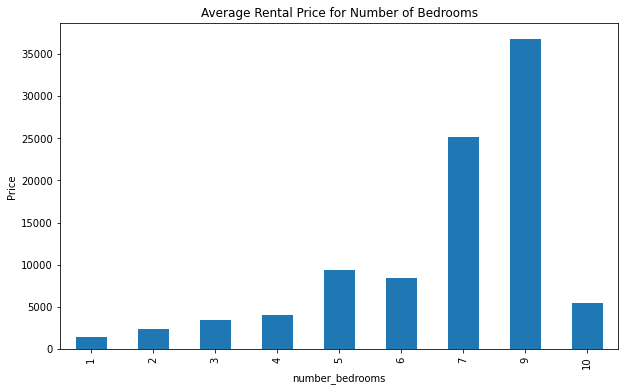

In [7]:
mean_plot.plot(kind="bar", figsize=(10,6), title="Average Rental Price for Number of Bedrooms", ylabel="Price");

### Linear Regression Modelling

One model will be with postcode dummy columns and the other model will be a simple model with just number of bedrooms and the price predictor.

In [8]:
X_train, X_test, y_train, y_test = split_data(df)

In [9]:
model = lin_model_train(X_train, y_train)

In [10]:
mae, mse, r2 = lin_model_predict(model, X_test, y_test)

In [11]:
print("Mean Absolute Error: {}".format(mae))
print("Mean Square Error  : {}".format(mse))
print("R2 Score           : {}".format(r2))

Mean Absolute Error: 6141485350230.952
Mean Square Error  : 1.6433052741044766e+28
R2 Score           : -8.581089371750631e+20


In [12]:
X_train_no_dum, X_test_no_dum, y_train_no_dum, y_test_no_dum = split_data_no_dummy(df)

In [13]:
model_no_dum = lin_model_train(X_train_no_dum.to_numpy().reshape(-1,1), y_train_no_dum)

In [14]:
mae_2, mse_2, r2_2 = lin_model_predict(model_no_dum, X_test_no_dum.to_numpy().reshape(-1,1), y_test_no_dum)

In [15]:
print("Mean Absolute Error for no dummy columns: {}".format(mae_2))
print("Mean Square Error for no dummy columns  : {}".format(mse_2))
print("R2 Score  for no dummy columns          : {}".format(r2_2))

Mean Absolute Error for no dummy columns: 1398.3801995495555
Mean Square Error for no dummy columns  : 17075503.599534933
R2 Score  for no dummy columns          : 0.10834325937943079


The first model performs bad with all the dummy columns. There are a lot of postcode values, over 200 and not enough of each postcode. The model performs much better as a simple model, using bedrooms to predict the price.

In [16]:
final_model = lin_model_train(df["number_bedrooms"].to_numpy().reshape(-1,1), df["price"])

In [17]:
save_model(final_model)